# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | monte santo de minas
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mahenge
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | ourilandia do norte
City not found. Skipping...
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | moriki
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | fisterra
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | mufulira
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | papao
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,-8.85,88,100,2.58,RU,1707245712
1,guerrero negro,27.9769,-114.0611,15.96,90,100,4.28,MX,1707245727
2,monte santo de minas,-21.1897,-46.9803,28.05,45,100,1.49,BR,1707245906
3,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245709
4,mahenge,-8.6833,36.7167,19.40,95,97,0.31,TZ,1707245906


In [7]:
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
output_file_path = "../output_data/cities.csv"
city_data_df.to_csv(output_file_path, index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,-8.85,88,100,2.58,RU,1707245712
1,guerrero negro,27.9769,-114.0611,15.96,90,100,4.28,MX,1707245727
2,monte santo de minas,-21.1897,-46.9803,28.05,45,100,1.49,BR,1707245906
3,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245709
4,mahenge,-8.6833,36.7167,19.40,95,97,0.31,TZ,1707245906


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

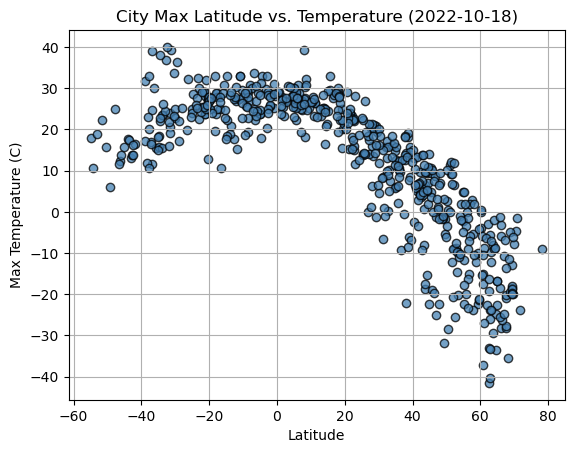

In [10]:
# Build scatter plot for latitude vs. temperature with SteelBlue colored markers
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1a.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

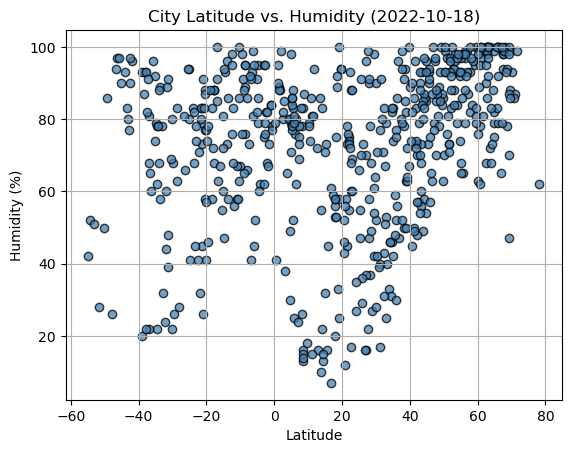

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2a.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

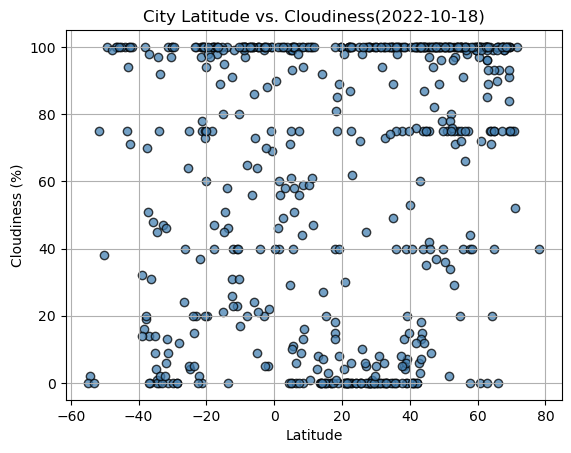

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3a.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

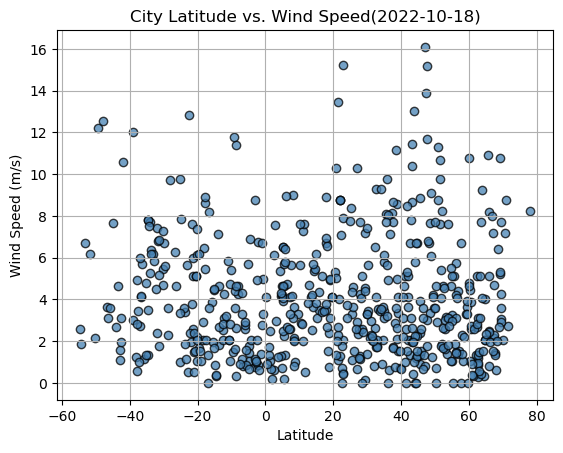

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4a.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_path):
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Create line equation
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", facecolors="SteelBlue", alpha=0.75)

    #Plot regression line
    plt.plot(x_values, regress_values, "r-")

    #Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    #Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

   #Print R-squared value
    print(f"The r-value is: {rvalue**2:.16f}")

    #Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,-8.85,88,100,2.58,RU,1707245712
1,guerrero negro,27.9769,-114.0611,15.96,90,100,4.28,MX,1707245727
5,tiksi,71.6872,128.8694,-23.85,99,100,2.72,RU,1707245755
10,moriki,12.8741,6.4875,23.35,16,8,4.68,NG,1707245907
13,fisterra,42.9049,-9.2629,13.75,90,100,7.79,ES,1707245908


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,monte santo de minas,-21.1897,-46.9803,28.05,45,100,1.49,BR,1707245906
3,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245709
4,mahenge,-8.6833,36.7167,19.40,95,97,0.31,TZ,1707245906
6,edinburgh of the seven seas,-37.0676,-12.3116,17.04,68,14,2.72,SH,1707245716
7,waitangi,-43.9535,-176.5597,17.68,93,100,2.68,NZ,1707245706


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7565198728734055


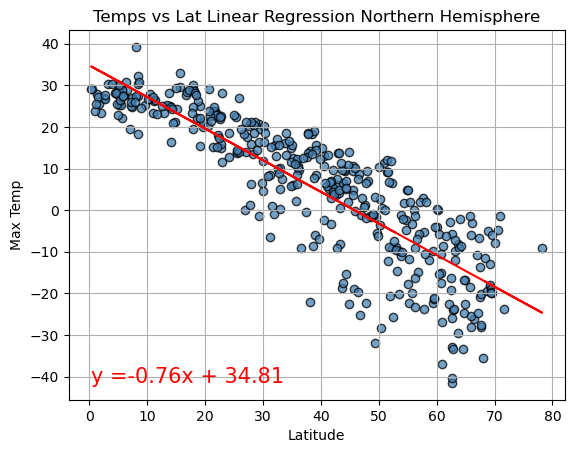

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Northern Hemisphere", "Latitude", "Max Temp", "../output_data/Northern_Hemisphere_MaxTemp_regression1.png")

The r-value is: 0.2005579322595132


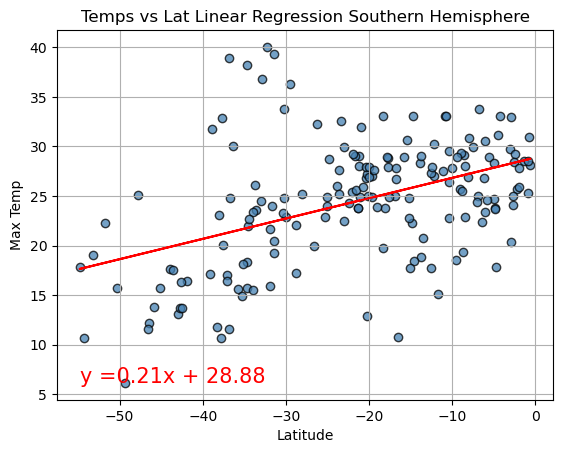

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Southern Hemisphere", "Latitude", "Max Temp", "../output_data/southern_hemi_df_MaxTemp_regression1.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: 
The linear regression chart for the Northern Hemisphere shows a fairly strong negative correlation between temperature and latitude.
Southern Hemisphere:
 The linear regression chart for the Southern Hemisphere shows a moderately positive correlation between temperature and latitude.
In the Northern Hemisphere, temperature decreases as latitude increases, moving away from the equator.
In the Southern Hemisphere, temperature increases as latitude decreases, moving closer to the equator.
The relationships are regarding the differences in solar radiation received in the particular latitude and may be affected by other climatic factors between the hemispheres, thus it may vary.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2037316651997561


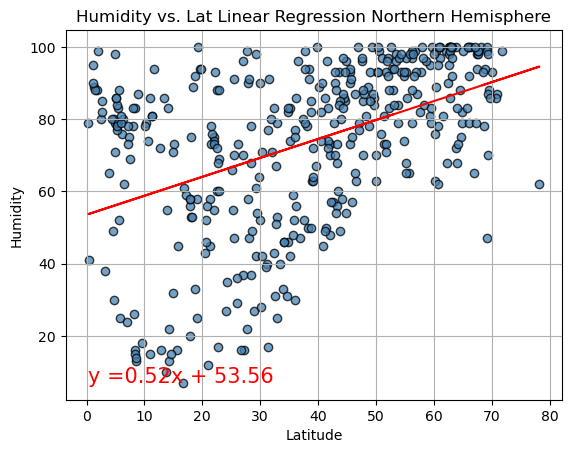

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Humidity", "../output_data/N_Hemisphere_Hum_regression1.png")

The r-value is: 0.0395049568361172


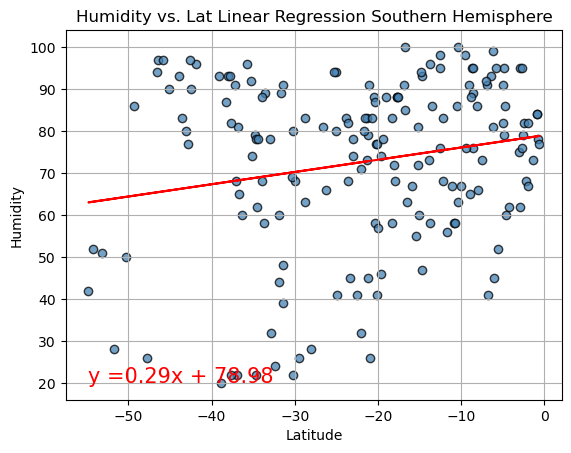

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Humidity", "../output_data/S_Hemisphere_Hum_regression1.png")

**Discussion about the linear relationship:** 
Northern Hemisphere:
The linear regression chart shows a very moderately positive correlation between humidity and latitude.
Southern Hemisphere:
The linear regression chart shows a very weak positive correlation to no correlation between humidity and latitude.
This would indicate that in the Northern Hemisphere, there is a slight tendency for humidity to increase with increasing latitude, while in the Southern Hemisphere, the latitude might not  be asignificant predictor of humidity.
This could be attributed to variations in climate conditions, geographical features, and/or variance in the atmospheric environment.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1176471326132245


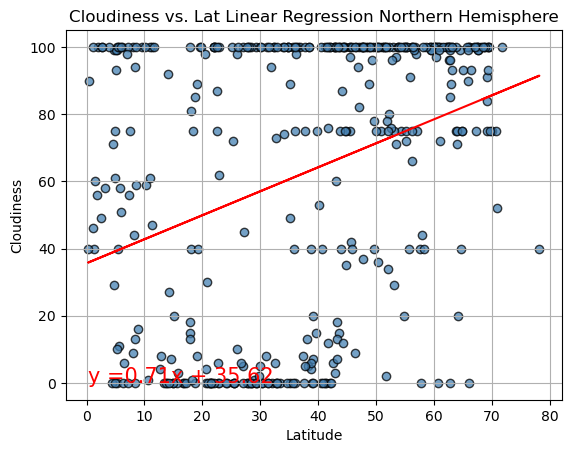

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Cloudiness", "../output_data/N_Hemisphere_Cloud_regression1.png")

The r-value is: 0.0492274609368484


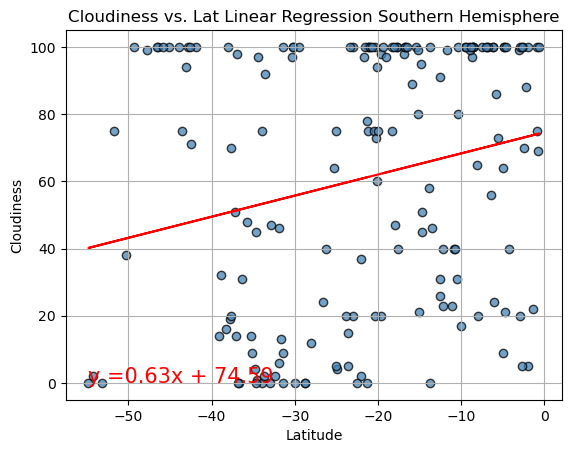

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Cloudiness", "../output_data/S_Hemisphere_Cloud_regression1.png")

**Discussion about the linear relationship:**
Northern Hemisphere: 
There is no correlation between cloudiness and latitude.
Southern Hemisphere:
Also displays no correlation between cloudiness and latitude.
This leads me to believe that there are other factors affecting the level of cloudiness, which is not influenced by the latitude of the location. There could also be seasonal variations, weather patterns, and other influences. Further analysis would have to be done to determine this.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001572219387899


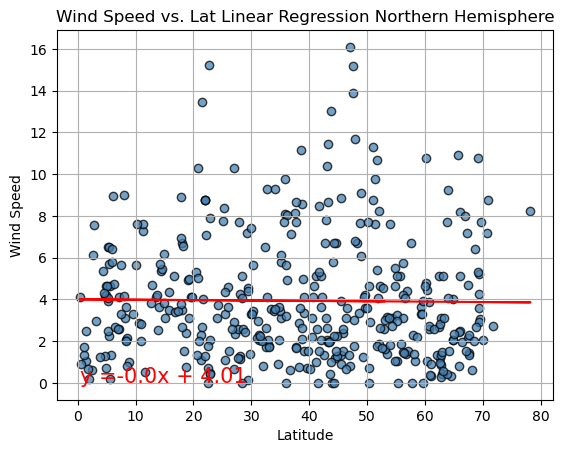

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Wind Speed", "../output_data/N_Hemisphere_WS_regression1.png")

The r-value is: 0.0563125004668471


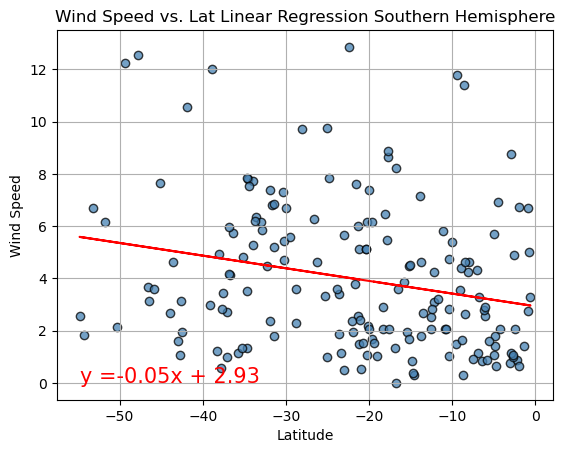

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Wind Speed", "../output_data/S_Hemisphere_WS_regression1.png")

**Discussion about the linear relationship:**
Northern Hemisphere:
Very little, meaning weak to no correlation between wind speed and latitude.
Southern Hemisphere:
Very weak negative correlation to no correlation at all between wind speed and latitude.
With this, there might be a lack of significant relationship between wind speed and latitude in both hemispheres, as the patterns don't show a clear trend.
There might be other factors to consider aside from the latitude alone to find more information regarding what affects wind speeds in these locations.
Local topography, oceanic currents, atmospheric pressure systems might be something to consider for future observations.
